In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

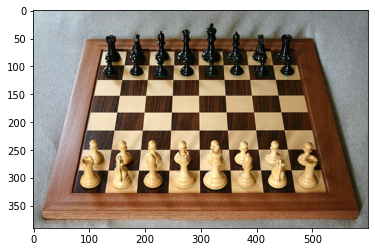

In [2]:
#img = cv2.imread('shapes.png')
img = cv2.imread('real_chessboard.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

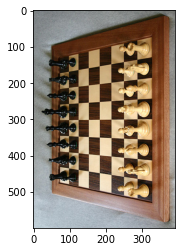

In [3]:
# Rotate Image
rot_img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(rot_img)

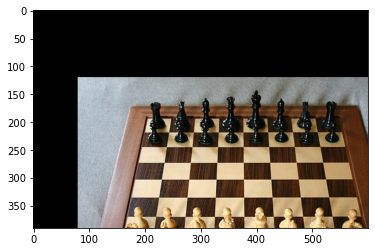

In [4]:
# Translate Image
warp_mat = np.float32([ [1,0,80], [0,1,120] ])
trnslt_img = cv2.warpAffine(img, warp_mat, (img.shape[1], img.shape[0]))
plt.imshow(trnslt_img)

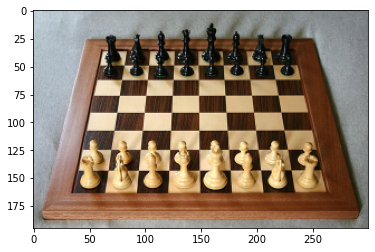

In [5]:
# Scale Image
scale_img = cv2.resize(img, (0,0), fx=0.5, fy=0.5, interpolation= cv2.INTER_LINEAR)
plt.imshow(scale_img)

In [6]:
# Converting color image to grayscale image for Harris corner detection
img = cv2.imread('real_chessboard.jpg')
#img = cv2.imread('shapes.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = np.float32(gray_img)

gray_rot_img = cv2.rotate(gray_img, cv2.ROTATE_90_COUNTERCLOCKWISE)

warp_mat = np.float32([ [1,0,80], [0,1,120] ])
gray_trnslt_img = cv2.warpAffine(gray_img, warp_mat, (gray_img.shape[1], gray_img.shape[0]))

gray_scale_img = cv2.resize(gray_img, (0,0), fx=0.5, fy=0.5, interpolation= cv2.INTER_LINEAR)

In [7]:
dst1 = cv2.cornerHarris(gray_img,2,3,0.04)
dst2 = cv2.cornerHarris(gray_rot_img,2,3,0.04)
dst3 = cv2.cornerHarris(gray_trnslt_img,2,3,0.04)
dst4 = cv2.cornerHarris(gray_scale_img,2,3,0.04)

In [8]:
# Counting number of corner points
corners1 = np.zeros(dst1.shape)
corners2 = np.zeros(dst2.shape)
corners3 = np.zeros(dst3.shape)
corners4 = np.zeros(dst4.shape)

corners1[dst1 > 0.01*dst1.max()] = 255
corners2[dst2 > 0.01*dst2.max()] = 255
corners3[dst3 > 0.01*dst3.max()] = 255
corners4[dst4 > 0.01*dst4.max()] = 255

a1 = []
a1.append(np.argwhere(corners1==255))
a2 = []
a2.append(np.argwhere(corners2==255))
a3 = []
a3.append(np.argwhere(corners3==255))
a4 = []
a4.append(np.argwhere(corners4==255))

num_corners1 = len(corners1[corners1==255])
num_corners2 = len(corners2[corners2==255])
num_corners3 = len(corners3[corners3==255])
num_corners4 = len(corners4[corners4==255])

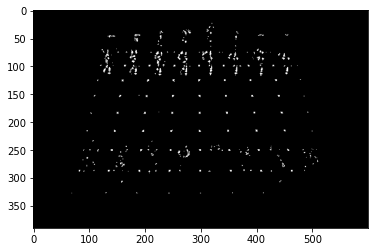

In [9]:
plt.imshow(corners1, cmap='gray')

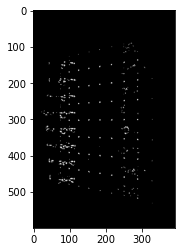

In [10]:
plt.imshow(corners2, cmap='gray')

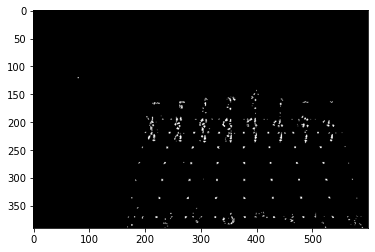

In [11]:
plt.imshow(corners3, cmap='gray')

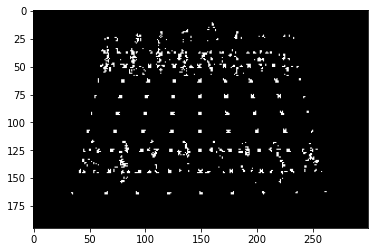

In [12]:
plt.imshow(corners4, cmap='gray')

In [13]:
# Result for making the corners not important
dst1 = cv2.dilate(dst1,None)
dst2 = cv2.dilate(dst2,None)
dst3 = cv2.dilate(dst3,None)
dst4 = cv2.dilate(dst4,None)

# Thresholding for an optimal value
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img[dst1>0.01*dst1.max()]=[255,0,0]

rot_img[dst2>0.01*dst2.max()]=[255,0,0]

trnslt_img[dst3>0.01*dst3.max()]=[255,0,0]

scale_img[dst4>0.01*dst4.max()]=[255,0,0]

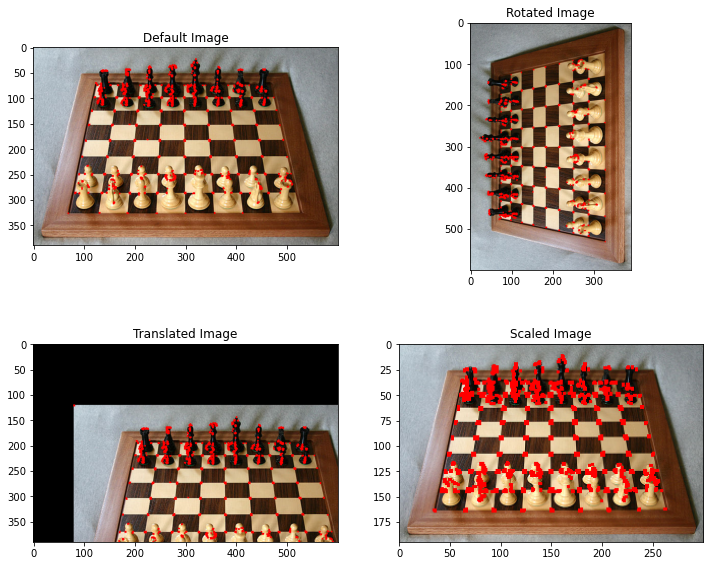

In [14]:
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(2,2,1)
ax.set_title('Default Image')
ax.imshow(img)

ax2 = fig.add_subplot(2,2,2)
ax2.set_title('Rotated Image')
ax2.imshow(rot_img)

ax3 = fig.add_subplot(2,2,3)
ax3.set_title('Translated Image')
ax3.imshow(trnslt_img)

ax4 = fig.add_subplot(2,2,4)
ax4.set_title('Scaled Image')
ax4.imshow(scale_img)

plt.show()

In [15]:
print("The number of Harris corners in the Normal image is:", num_corners1)
print("The number of Harris corners in the Rotated image is:", num_corners2)
print("The number of Harris corners in the Translate image is:", num_corners3)
print("The number of Harris corners in the 1/2 scale image is:", num_corners4)

The number of Harris corners in the Normal image is: 2262
The number of Harris corners in the Rotated image is: 2262
The number of Harris corners in the Translate image is: 2033
The number of Harris corners in the 1/2 scale image is: 1696


- When the image is rotated, the harris corner algorithm detects the same number of corners as with the normal image.
- The detected corners are less in case of translated image if the image is shifted beyond the size because there are less corners in the image.
- For the 1/2 scaled image, because the detected corner points are too close together, the algorithm fails to dinstinguish between individual points.